In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import iplot
from sklearn.preprocessing import StandardScaler

# Importing data

In [106]:
data = pd.read_csv('data/customer_segmentation_data.csv')

In [107]:
data

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4
...,...,...,...,...
3829,11.0,79.00,0,3
3830,28.0,79.00,0,2
3831,57.0,36.00,2,2
3832,44.0,36.00,2,1


# Exploring Data

In [108]:
data = data.rename({'CLV':'costum_revenue_generated'}, axis=1)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   minutes_watched           3725 non-null   float64
 1   costum_revenue_generated  3834 non-null   float64
 2   region                    3834 non-null   int64  
 3   channel                   3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


In [110]:
data.describe()

,minutes_watched,costum_revenue_generated,region,channel
count,3725.000000,3834.000000,3834.000000,3834.000000
mean,1972.094497,118.383920,1.167188,3.870370
std,7401.693028,70.471274,0.923055,2.191972
min,0.000000,0.000000,0.000000,1.000000
25%,159.000000,62.580000,0.000000,2.000000
50%,512.000000,119.000000,2.000000,3.000000
75%,1521.000000,149.990000,2.000000,6.000000
max,288508.000000,626.400000,2.000000,8.000000


## Missing Values :

In [111]:
data.isna().sum()

minutes_watched             109
costum_revenue_generated      0
region                        0
channel                       0
dtype: int64

In [112]:
missing_part_of_data = data[data['minutes_watched'].isna()]

In [113]:
missing_part_of_data.describe()

,minutes_watched,costum_revenue_generated,region,channel
count,0.0,109.000000,109.000000,109.000000
mean,NaN,132.736147,0.963303,4.174312
std,NaN,57.836728,0.942088,2.296713
min,NaN,36.000000,0.000000,1.000000
25%,NaN,82.040000,0.000000,3.000000
50%,NaN,119.230000,1.000000,4.000000
75%,NaN,156.000000,2.000000,6.000000
max,NaN,348.000000,2.000000,8.000000


In [114]:
data['minutes_watched'] = data['minutes_watched'].fillna(0)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   minutes_watched           3834 non-null   float64
 1   costum_revenue_generated  3834 non-null   float64
 2   region                    3834 non-null   int64  
 3   channel                   3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


## Outliers

In [116]:
curve_colors = [
    'rgba(65, 105, 225, 0.8)', 'rgba(244, 164, 96, 0.8)', 
    'rgba(205, 92, 92, 0.8)', 'rgba(20, 92, 92, 0.8)', 
    'rgba(205, 9, 92, 0.8)'
]

fig = go.Figure()

for i, y in enumerate(['minutes_watched','costum_revenue_generated']):
        fig.add_trace(go.Box(
            y=data[y],
            name=f'{y}',
            marker_color=curve_colors[i % len(curve_colors)],
            boxmean='sd'
        ))

fig.update_layout(
    plot_bgcolor='rgba(50, 50, 50, 1)',
    paper_bgcolor='rgba(50, 50, 50, 1)',
    font=dict(color='white'),
    title="Boxplot avec Outliers",
    yaxis=dict(title="Features")
)

fig.show()

Here i took the decising to not remove the outliers because i don't want to lose customers informations.

# Feature engineering

In [117]:
data['region'].unique()

array([2, 0, 1])

In [118]:
data['channel'].unique()

array([4, 1, 2, 3, 8, 6, 7, 5])

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   minutes_watched           3834 non-null   float64
 1   costum_revenue_generated  3834 non-null   float64
 2   region                    3834 non-null   int64  
 3   channel                   3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


In [120]:
data_with_feature_eng = pd.get_dummies(data, columns=['region', 'channel'], drop_first=False)

In [121]:
data_with_feature_eng

,minutes_watched,costum_revenue_generated,region_0,region_1,region_2,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8
0,3197.0,205.42,False,False,True,False,False,False,True,False,False,False,False
1,63.0,149.99,True,False,False,True,False,False,False,False,False,False,False
2,605.0,119.00,False,False,True,False,True,False,False,False,False,False,False
3,20.0,240.00,False,False,True,False,False,False,True,False,False,False,False
4,245.0,184.36,False,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,11.0,79.00,True,False,False,False,False,True,False,False,False,False,False
3830,28.0,79.00,True,False,False,False,True,False,False,False,False,False,False
3831,57.0,36.00,False,False,True,False,True,False,False,False,False,False,False
3832,44.0,36.00,False,False,True,True,False,False,False,False,False,False,False


===> For Region :
{0	US, Canada, United Kingdom, Australia}
{1	Western Europe}
{2	Rest of the world}

===> For Channel :
{1	Google}
{2	Facebook}
{3	YouTube}
{4	LinkedIn}
{5	Twitter}
{6	Instagram}
{7	Friend}
{8	Other}

In [122]:
data_with_feature_eng = data_with_feature_eng.rename({
    "region_0": "anglo-saxon_countries",
    "region_1": "west_europe",
    "region_2": "rest_world",
    "channel_1": "google",
    "channel_2": "facebook",
    "channel_3": "youtube",
    "channel_4": "linkedin",
    "channel_5": "x",
    "channel_6": "instagram",
    "channel_7": "friend",
    "channel_8": "other",
}, axis=1)

# Correlation analysis

In [123]:
correlation_matrix = data_with_feature_eng[['minutes_watched','costum_revenue_generated']].corr()

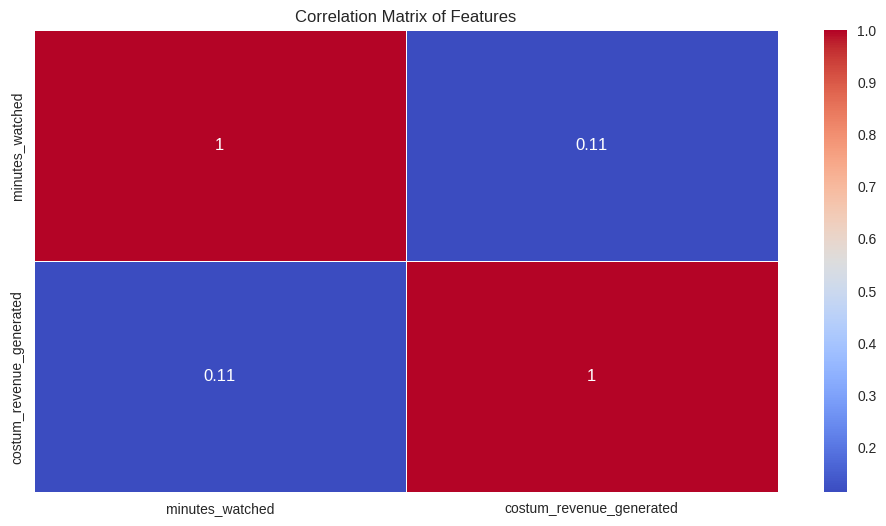

In [124]:
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

In [125]:
background_color = 'rgba(50, 50, 50, 1)'
text_color = 'white'
curve_colors = ['rgba(65, 105, 225, 0.8)', 'rgba(244, 164, 96, 0.8)', 
                'rgba(205, 92, 92, 0.8)', 'rgba(20, 92, 92, 0.8)', 
                'rgba(205, 9, 92, 0.8)']

x_column_name = 'costum_revenue_generated'
y_column_name = 'minutes_watched'

fig_line = go.Figure()
fig_line.add_trace(go.Scatter(x=data_with_feature_eng[x_column_name], y=data_with_feature_eng[y_column_name], mode='markers', line=dict(color=curve_colors[0]), marker=dict(color=curve_colors[2], size=5), name=y_column_name))
    
fig_line.update_layout(
    title=f'Plot {y_column_name} / {x_column_name}',
    xaxis_title=x_column_name, yaxis_title=y_column_name,
    plot_bgcolor=background_color, paper_bgcolor=background_color,
    font=dict(color=text_color),
    height=600
)
iplot(fig_line)

# Model Implementation

## Standardize the data

In [126]:
data_with_feature_eng.describe()

,minutes_watched,costum_revenue_generated
count,3834.000000,3834.000000
mean,1916.028169,118.383920
std,7303.052488,70.471274
min,0.000000,0.000000
25%,137.000000,62.580000
50%,480.500000,119.000000
75%,1464.000000,149.990000
max,288508.000000,626.400000


--> Here we can see that features don't have the same order of variance : 7303.052488  << 70.471274

In [127]:
stand_scaler = StandardScaler()

In [128]:
numeric_cols = data_with_feature_eng.select_dtypes(include=['float64']).columns

In [129]:
data_with_feature_eng[numeric_cols] = stand_scaler.fit_transform(data_with_feature_eng[numeric_cols])

In [130]:
data_with_feature_eng.describe()

,minutes_watched,costum_revenue_generated
count,3.834000e+03,3.834000e+03
mean,-1.482614e-17,7.413070e-17
std,1.000130e+00,1.000130e+00
min,-2.623941e-01,-1.680108e+00
25%,-2.436324e-01,-7.919709e-01
50%,-1.965911e-01,8.743423e-03
75%,-6.190386e-02,4.485544e-01
max,3.924788e+01,7.209779e+00


In [131]:
data_with_feature_eng

,minutes_watched,costum_revenue_generated,anglo-saxon_countries,west_europe,rest_world,google,facebook,youtube,linkedin,x,instagram,friend,other
0,0.175425,1.235219,False,False,True,False,False,False,True,False,False,False,False
1,-0.253766,0.448554,True,False,False,True,False,False,False,False,False,False,False
2,-0.179541,0.008743,False,False,True,False,True,False,False,False,False,False,False
3,-0.259655,1.725979,False,False,True,False,False,False,True,False,False,False,False
4,-0.228842,0.936335,False,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,-0.260888,-0.558938,True,False,False,False,False,True,False,False,False,False,False
3830,-0.258560,-0.558938,True,False,False,False,True,False,False,False,False,False,False
3831,-0.254588,-1.169195,False,False,True,False,True,False,False,False,False,False,False
3832,-0.256368,-1.169195,False,False,True,True,False,False,False,False,False,False,False


## Clustering

## Hierarchical Clustering

In [132]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [133]:
hier_clust = linkage(data_with_feature_eng, method = 'ward')

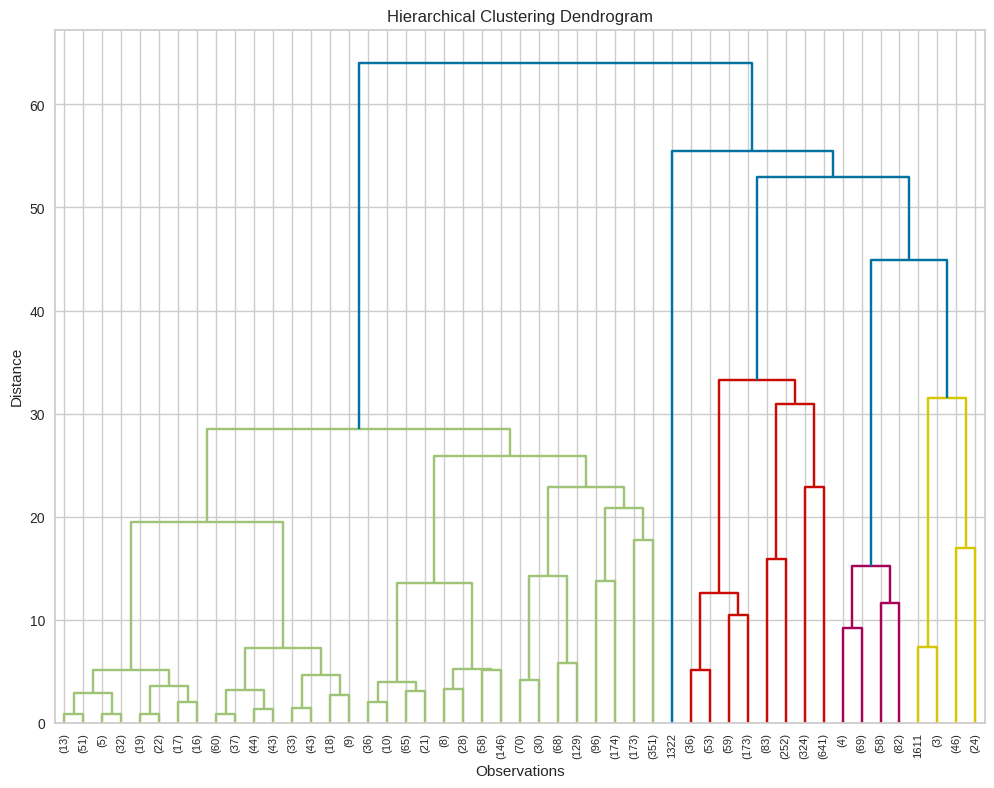

In [134]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = True)
plt.show()

## Kmeans

In [135]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Elbow Method to determine the number of clusters to be formed:


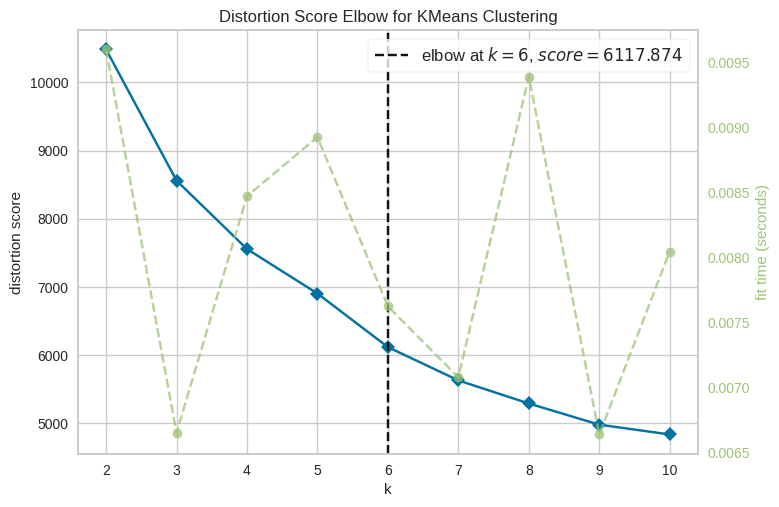

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [136]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10)
Elbow_M.fit(data_with_feature_eng)
Elbow_M.show()

In [137]:
kmeans = KMeans(n_clusters=Elbow_M.elbow_value_,random_state=42)
kmeans.fit(data_with_feature_eng)

data_with_feature_eng["Clusters_kmeans"]= kmeans.labels_

## Clustering results

In [138]:
import seaborn as sns
from plotly.subplots import make_subplots
from matplotlib import colors

In [139]:
data_with_feature_eng['region'] = data['region']
data_with_feature_eng['channel'] = data['channel']

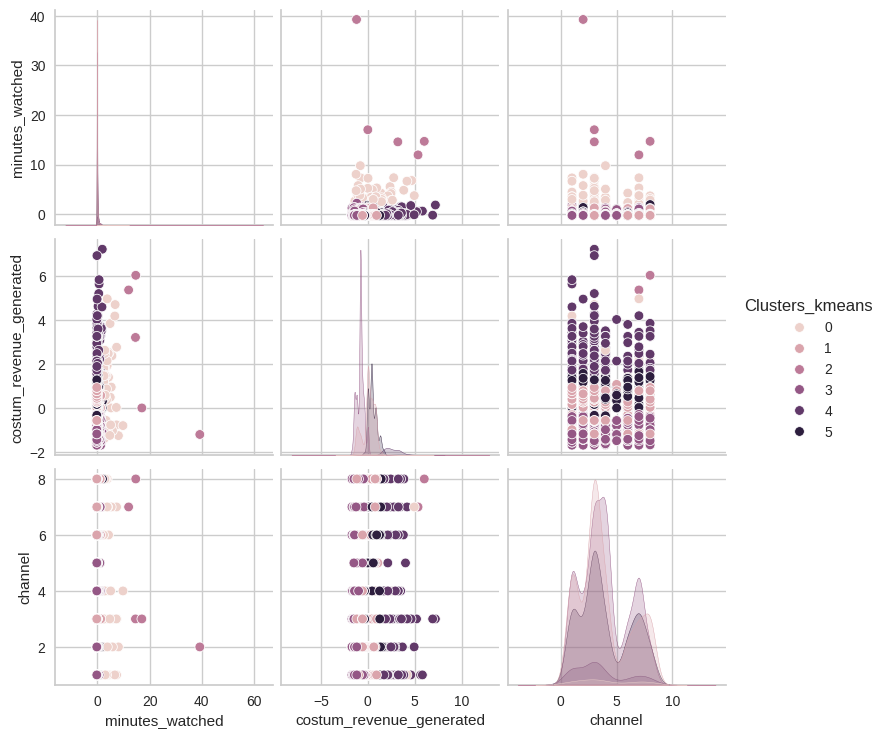

In [140]:
sns.pairplot(data_with_feature_eng, hue='Clusters_kmeans', vars=['minutes_watched','costum_revenue_generated','channel'])
plt.show()

In [141]:
x = data_with_feature_eng['costum_revenue_generated']
y = data_with_feature_eng['minutes_watched']
z = data_with_feature_eng['channel']

fixed_colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#00CA91']

# Create subplots with two columns for comparison
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{'type': 'scatter3d'}]],
    subplot_titles=("KMeans Clustering")
)
clusters_kmeans = data_with_feature_eng['Clusters_kmeans']

for cluster_id in clusters_kmeans.unique():
    cluster_mask = clusters_kmeans == cluster_id
    fig.add_trace(
        go.Scatter3d(
            x=x[cluster_mask], 
            y=y[cluster_mask], 
            z=z[cluster_mask],
            mode='markers',
            marker=dict(
                color=fixed_colors[cluster_id], 
                size=5,
                opacity=0.6
            ),
            name=f"Cluster {cluster_id}" 
        ),
        row=1, col=1
    )


fig.update_layout(
    title="3D Projection of Data with KMeans and Agglomerative Clustering",
    scene=dict(
        xaxis=dict(backgroundcolor=background_color, color=text_color, gridcolor=text_color),
        yaxis=dict(backgroundcolor=background_color, color=text_color, gridcolor=text_color),
        zaxis=dict(backgroundcolor=background_color, color=text_color, gridcolor=text_color),
        xaxis_title=x.name, 
        yaxis_title=y.name,
        zaxis_title=z.name,

    ),
    paper_bgcolor=background_color,
    font=dict(color=text_color),
    height=700
)


fig.show()

In [142]:
x = data_with_feature_eng['costum_revenue_generated']
y = data_with_feature_eng['minutes_watched']
z = data['region']

fixed_colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#00CA91']

# Create subplots with two columns for comparison
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{'type': 'scatter3d'}]],
    subplot_titles=("KMeans Clustering")
)
clusters_kmeans = data_with_feature_eng['Clusters_kmeans']

for cluster_id in clusters_kmeans.unique():
    cluster_mask = clusters_kmeans == cluster_id
    fig.add_trace(
        go.Scatter3d(
            x=x[cluster_mask], 
            y=y[cluster_mask], 
            z=z[cluster_mask],
            mode='markers',
            marker=dict(
                color=fixed_colors[cluster_id], 
                size=5,
                opacity=0.6
            ),
            name=f"Cluster {cluster_id}" 
        ),
        row=1, col=1
    )


fig.update_layout(
    title="3D Projection of Data with KMeans and Agglomerative Clustering",
    scene=dict(
        xaxis=dict(backgroundcolor=background_color, color=text_color, gridcolor=text_color),
        yaxis=dict(backgroundcolor=background_color, color=text_color, gridcolor=text_color),
        zaxis=dict(backgroundcolor=background_color, color=text_color, gridcolor=text_color),
        xaxis_title=x.name, 
        yaxis_title=y.name,
        zaxis_title=z.name,

    ),
    paper_bgcolor=background_color,
    font=dict(color=text_color),
    height=700
)


fig.show()

In [143]:
kmeans_counts = data_with_feature_eng["Clusters_kmeans"].value_counts().sort_index()
fixed_colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#00CA91']


fig = make_subplots(rows=1, cols=1, subplot_titles=("KMeans Clustering"))


# KMeans Clustering bar chart
fig.add_trace(
    go.Bar(
        x=kmeans_counts.index,
        y=kmeans_counts.values,
        marker=dict(color=[fixed_colors[i % len(fixed_colors)] for i in kmeans_counts.index]),
        name="KMeans"
    ),
    row=1, col=1
)


fig.update_layout(
    title="Distribution of the Clusters",
    xaxis_title="Cluster Label",
    yaxis_title="Count",
    showlegend=True,
    paper_bgcolor=background_color,
    font=dict(color=text_color),
    height=600
)

fig.show()


## Analysis of results 

In [144]:
data_to_analys = data_with_feature_eng[[col for col in data_with_feature_eng.columns.to_list() if col not in ['region','channel']]]

In [145]:
data_to_analys.loc[:, ['minutes_watched', 'costum_revenue_generated']] = stand_scaler.inverse_transform(
    data_to_analys.loc[:, ['minutes_watched', 'costum_revenue_generated']]
)

In [155]:
mean_cols = ['minutes_watched', 'costum_revenue_generated']
weighted_mean_cols = data_to_analys.select_dtypes(include=['bool']).columns.to_list()

In [156]:
mean_agg = {col: 'mean' for col in mean_cols}
weighted_mean_agg = {col: lambda x: (x / len(x)).sum() for col in weighted_mean_cols}

agg_dict = {**mean_agg, **weighted_mean_agg}

data_analysis = data_to_analys.groupby('Clusters_kmeans').agg(agg_dict)

In [158]:
data_analysis['prop'] = data_to_analys.groupby('Clusters_kmeans')['Clusters_kmeans'].count()

In [159]:
data_analysis

,minutes_watched,costum_revenue_generated,anglo-saxon_countries,west_europe,rest_world,google,facebook,youtube,linkedin,x,instagram,friend,other,prop
Clusters_kmeans,,,,,,,,,,,,,,
0,31176.309091,181.788000,0.290909,0.163636,0.545455,0.181818,0.090909,0.272727,0.127273,0.000000,0.054545,0.145455,0.127273,55
1,949.268156,124.510694,1.000000,0.000000,0.000000,0.187550,0.065443,0.335196,0.142059,0.007981,0.067039,0.087789,0.106943,1253
2,144241.800000,307.340000,0.400000,0.000000,0.600000,0.000000,0.200000,0.400000,0.000000,0.000000,0.000000,0.200000,0.200000,5
3,1369.299354,60.485233,0.004307,0.055276,0.940416,0.155779,0.091888,0.224695,0.238335,0.025126,0.074659,0.144293,0.045226,1393
4,2823.451087,307.942989,0.483696,0.244565,0.271739,0.255435,0.059783,0.336957,0.097826,0.010870,0.059783,0.103261,0.076087,184
5,1370.512712,154.046155,0.000000,0.349576,0.650424,0.171610,0.083686,0.298729,0.121822,0.011653,0.092161,0.147246,0.073093,944
